### **LOADING DATA**

In [2]:
#The dataset to be analyzed is saved in the google drive from which the data will be pulled from
#Here we mount the drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#Here we assign the dataset path on the drive to a variable
#It is important to note that the dataset has to be saved in the same filepath for the code to run. Alternatively, you copy and replace with your filepath

path = "/content/drive/MyDrive/HTT Project Cohort 4/Stroke Dataset.xlsx"

### **IMPORTING LIBRARIES**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline


### **READING, UNDERSTANDING AND CLEANING DATA**

In [5]:
#reading the first five rows of the dataset

df = pd.read_excel(path)
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#copying the original dataframe and saving in variable "df2". This will be used for analysis subsequently

df2 = df.copy()
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
#Getting the total counts of all the rows in he dataset
rows_count = df2.shape[0]
f"The original roww count is {rows_count}."

'The original roww count is 5110.'

In [8]:
#To get the datatypes and null counts for each columns

df2.info()

# Given that total row counts from the previous code is 5110, we can deduce that only bmi column has null values from the output of this code as the total non-null count is less than the total row count ---

# Another dedcution is the datatypes. for instance, We can see that ages is in float type which implies a continuous data. We would rather have age as a discrete data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
#To further confirm the number of rows with null values under the bmi column 

null_count = df2[pd.isnull(df2['bmi'])].shape[0]
null_count

#proportion to the total row count 
pct = round((null_count/rows_count)*100,2)
f"{pct} %"

'3.93 %'

In [10]:
#Considering that the proportion of the rows with null values to the entire dataset is insignificant, we drop the null rows

df2.dropna(subset=['bmi'], inplace=True)
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
#to confirm that the null values have been dropped
df2.info()

#count rows
print()
new_rowcount = df2.shape[0]
f"The new row count is {new_rowcount}."

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB



'The new row count is 4909.'

In [12]:
#Changing the age column to integer to keep as a discrete data

newtype = df2['age'] = df2['age'].astype('int')
f"New datatype for age : {newtype.dtypes}."

'New datatype for age : int64.'

In [13]:
#To get a simple statistics of each columns in the dataset particularly columns with numerical values
df2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **ANALYSIS AND VISUALIZATION** 

#### *DEFINING FUNCTIONS AND VARIABLES TO BE REUSED*

In [14]:
df2["stroke"] = df2["stroke"].replace([0,1],["Without Stroke","With Stroke"])
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,With Stroke
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,With Stroke
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,With Stroke
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,With Stroke
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,With Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,Without Stroke
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,Without Stroke
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Without Stroke
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Without Stroke


In [40]:
df2["hypertension"] = df2["hypertension"].replace([0,1],["Does not have hypertension","Has hypertension"])
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_class,glucose_class
0,9046,Male,67,Does not have hypertension,1,Yes,Private,Urban,228.69,36.6,formerly smoked,With Stroke,60-69,Obesity Class II,Diabetes
2,31112,Male,80,Does not have hypertension,1,Yes,Private,Rural,105.92,32.5,never smoked,With Stroke,80-89,Obesity Class I,Pre-Diabetes
3,60182,Female,49,Does not have hypertension,0,Yes,Private,Urban,171.23,34.4,smokes,With Stroke,40-49,Obesity Class I,Diabetes
4,1665,Female,79,Has hypertension,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,With Stroke,70-79,Normal,Diabetes
5,56669,Male,81,Does not have hypertension,0,Yes,Private,Urban,186.21,29.0,formerly smoked,With Stroke,80-89,Pre-Obesity,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,Does not have hypertension,0,No,children,Rural,103.08,18.6,Unknown,Without Stroke,0-16,Normal,Pre-Diabetes
5106,44873,Female,81,Does not have hypertension,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,Without Stroke,80-89,Obesity Class III,Pre-Diabetes
5107,19723,Female,35,Does not have hypertension,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Without Stroke,30-39,Obesity Class I,Normal
5108,37544,Male,51,Does not have hypertension,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Without Stroke,50-59,Pre-Obesity,Diabetes


In [15]:
#The dataset was assigned to 2 different variables,one for patients with stroke
#the other for patients without stroke

#colors to be used were also defined here

stroke_data = df2[df2['stroke'] == "With Stroke"]
stroke_data2 = df2[df2['stroke'] == "Without Stroke"]

colors = ['royalblue', 'orange', 'brown', 'gray']

directory = "/content/drive/MyDrive/HTT Project Cohort 4/Images"
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,With Stroke
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,With Stroke
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,With Stroke
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,With Stroke
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,With Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,Without Stroke
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,Without Stroke
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Without Stroke
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Without Stroke


In [16]:
stroke_data.count()

id                   209
gender               209
age                  209
hypertension         209
heart_disease        209
ever_married         209
work_type            209
Residence_type       209
avg_glucose_level    209
bmi                  209
smoking_status       209
stroke               209
dtype: int64

In [17]:
font = {'size': 22}
def piechart(data, title):
  values = data.value_counts()
  labels = values.index
  plt.figure(figsize=(10,6))
  plt.title(title,fontdict=font)
  plt.pie(values,labels=labels, colors = colors, autopct='%1.2f%%')
  plt.show()

def countplt(data, variable, hue, title):
  plt.figure(figsize=(10,7))
  plt.title(title,fontdict=font)
  sns.countplot(x=variable, data = data, hue = hue, palette = colors)
  plt.show()

#### *GROUPING VARIABLES*  
Some columns like the age, bmi and average glucose level will be grouped

In [18]:
#getting the maximum ages to understand how to group the ages

max_age = df2['age'].max()
max_childage = df2[df2['work_type'] == 'children']['age'].max()

print(f"Max age: {max_age}")
print(f"Max child age: {max_childage}")


Max age: 82
Max child age: 16


In [19]:
#AGE GROUPING
bins = [0,17,20,30,40,50,60,70,80,90]
labels=['0-16','17-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']

df2['age_group'] = pd.cut(df2['age'],bins=bins,labels=labels,right=False)
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,With Stroke,60-69
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,With Stroke,80-89
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,With Stroke,40-49
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,With Stroke,70-79
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,With Stroke,80-89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,Without Stroke,0-16
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,Without Stroke,80-89
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Without Stroke,30-39
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Without Stroke,50-59


#### BMI GROUPING
* 0-18.49 == Underweight
* 18.5-24.9 == Normal
* 25.0- 25.9 == Pre-Obesity
* 30.0-34.9 == Obesity Class I
* 35.0- 39.9 == Obesity Class II
* Above 40 == Obesity Class III





In [20]:
#BMI GROUPING

bins=[0,18.5,25.0,30.0,35.0,40,100]
labels = ['Underweight','Normal', 'Pre-Obesity','Obesity Class I','Obesity Class II','Obesity Class III']

df2['bmi_class'] = pd.cut(df2['bmi'],bins=bins, labels=labels,right=False)
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_class
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,With Stroke,60-69,Obesity Class II
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,With Stroke,80-89,Obesity Class I
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,With Stroke,40-49,Obesity Class I
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,With Stroke,70-79,Normal
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,With Stroke,80-89,Pre-Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,Without Stroke,0-16,Normal
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,Without Stroke,80-89,Obesity Class III
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Without Stroke,30-39,Obesity Class I
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Without Stroke,50-59,Pre-Obesity


#### GLUCOSE LEVEL CLASSIFICATION


*   0 - 69.9 == Low
   
*   70-99.9 == Normal
* 100- 125 == Pre-Diabetes
* 126- 280 == Diabetes


In [21]:

bins=[0,70,100,126,280]
labels = ['Low','Normal', 'Pre-Diabetes','Diabetes']

df2['glucose_class'] = pd.cut(df2['avg_glucose_level'],bins=bins, labels=labels,right=False)
df2



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_class,glucose_class
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,With Stroke,60-69,Obesity Class II,Diabetes
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,With Stroke,80-89,Obesity Class I,Pre-Diabetes
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,With Stroke,40-49,Obesity Class I,Diabetes
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,With Stroke,70-79,Normal,Diabetes
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,With Stroke,80-89,Pre-Obesity,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,Without Stroke,0-16,Normal,Pre-Diabetes
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,Without Stroke,80-89,Obesity Class III,Pre-Diabetes
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Without Stroke,30-39,Obesity Class I,Normal
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Without Stroke,50-59,Pre-Obesity,Diabetes


### *BASIC VISUALS*

---

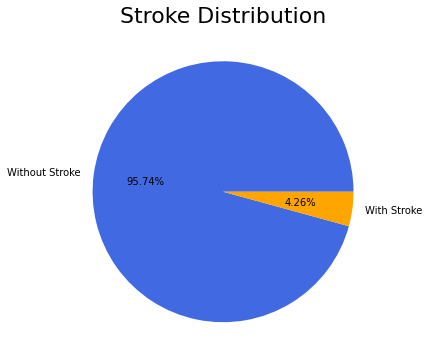

In [22]:
#PROPORTION OF PATIENTS WITH STROKE AND PATIENTS WITHOUT STROKE
piechart(df2["stroke"],"Stroke Distribution")

#from the result, we can see that the percentage of patients with stroke is quite insignificant. We can therefore say the indicators considered does not impact stroke greatly
#subsequent queries is for us to dig further

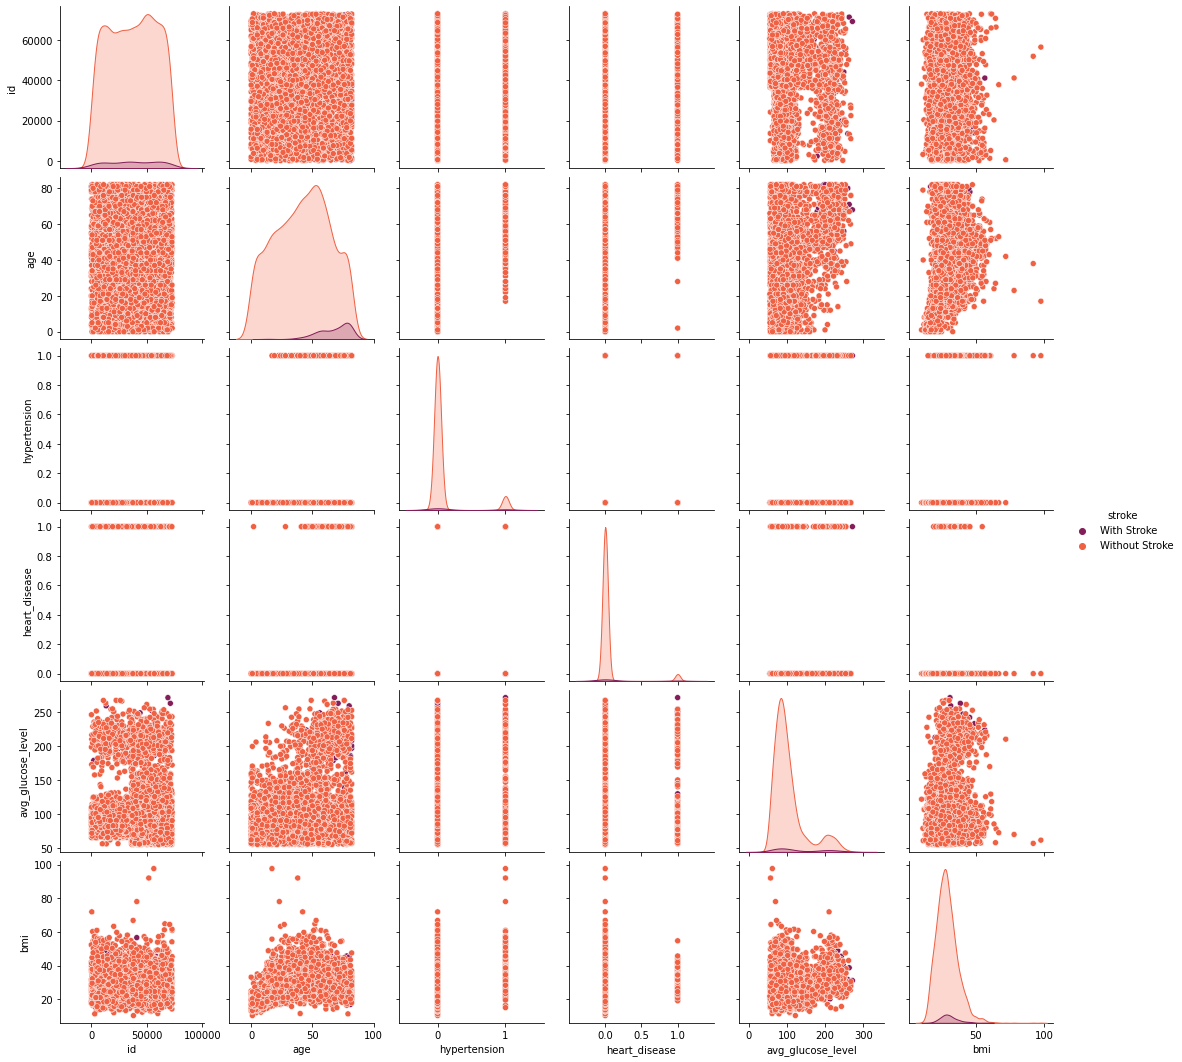

In [23]:
sns.pairplot(df2,hue='stroke', palette='rocket')

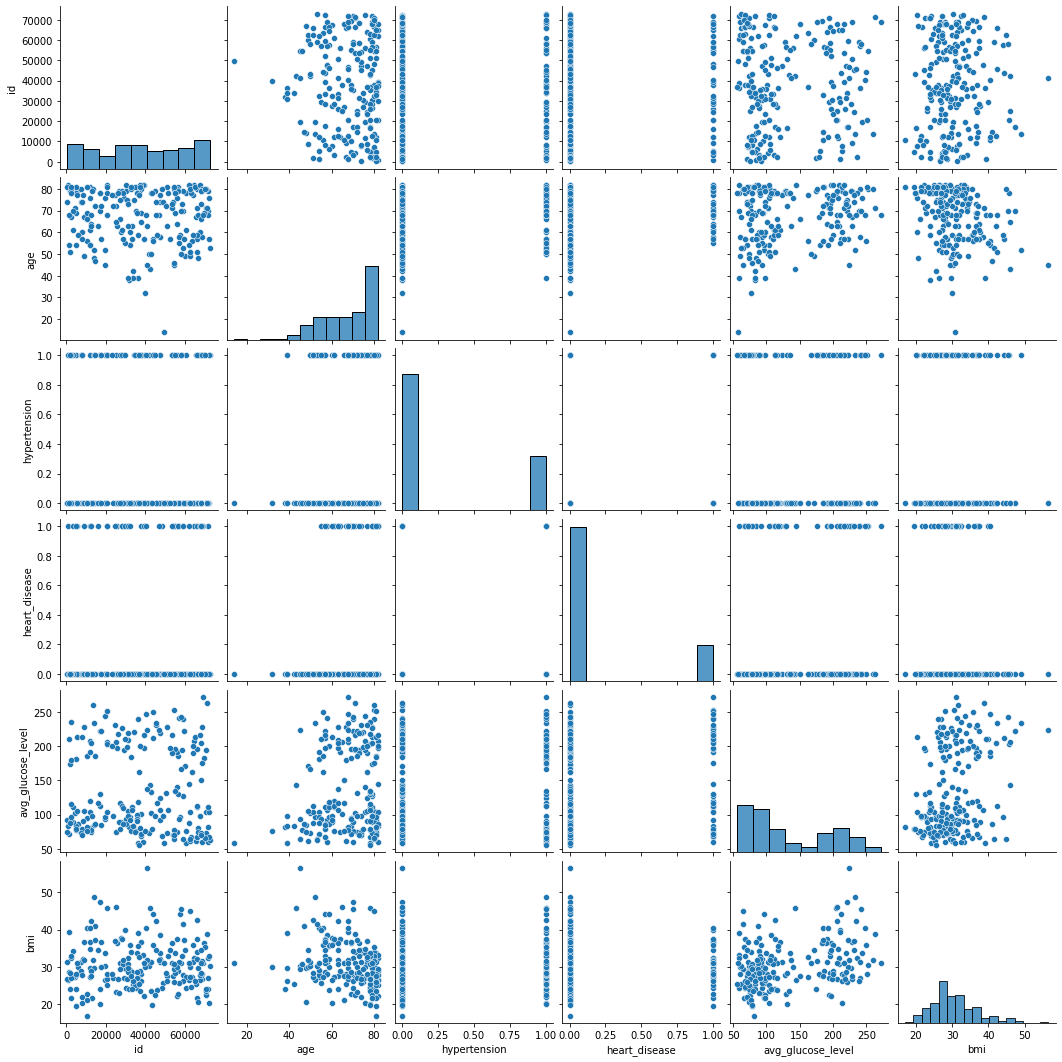

In [24]:
sns.pairplot(stroke_data,palette='rocket')

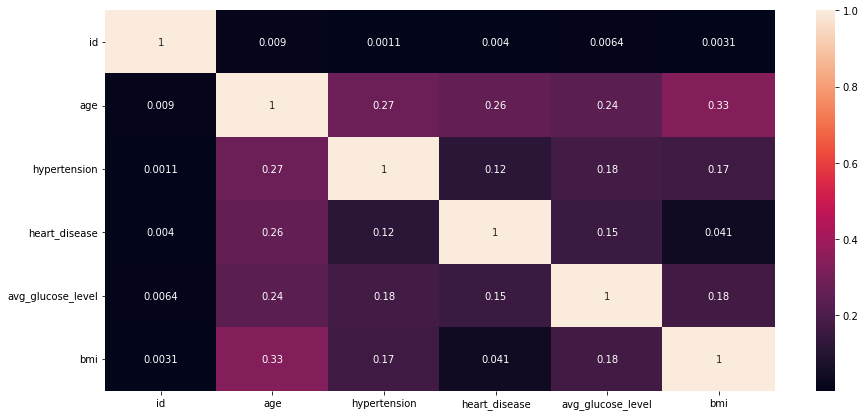

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),cbar=True, annot=True)
plt.show()

#from this plot  there isn't really much correlation between the variables
#the highest correlation stroke has is with age
#so compare stroke with age(main determining factor), then hypertension,heart diseas and avg_glucose_level
#so 4 determinig factor
#bmi barely has a correlation




### *QUERY 1*

---



**Does age have impact on stroke? and how is this parameter distributed?**

> To address this, we considered a range of code queries such as:
1.  Understanding what the maximum patient age is in the dataset. Then, we also looked at the maximum age for a child.
2. Grouping the ages into ranges of 9 bins to better represent the age distribution. The age groups are created as a new column in the datasets
3.  Writing more codes to see the interaction between age and stroke 
4. Making inferences from the outputs of the code




In [26]:
df2.groupby('age_group')['age'].count()

age_group
0-16     778
17-19    166
20-29    539
30-39    631
40-49    705
50-59    805
60-69    590
70-79    513
80-89    182
Name: age, dtype: int64

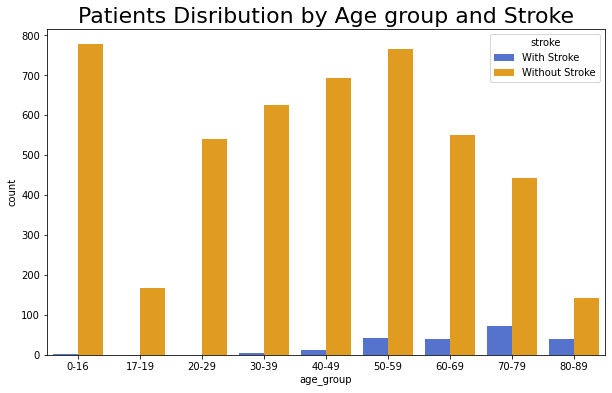

In [39]:
## QUESTION 1

plt.figure(figsize=(10,6))
plt.title('Patients Disribution by Age group and Stroke',fontdict=font)
sns.countplot(x="age_group",data=df2,hue="stroke", palette = colors)
plt.show()

#the age group 70-79 has the highest number of people with stroke


In [28]:
df2.groupby('smoking_status')['age_group'].apply(lambda x:(x=='70-79').sum())
#from this 51 that smoke, how many have stroke and how many do not

smoking_status
Unknown             93
formerly smoked    159
never smoked       210
smokes              51
Name: age_group, dtype: int64

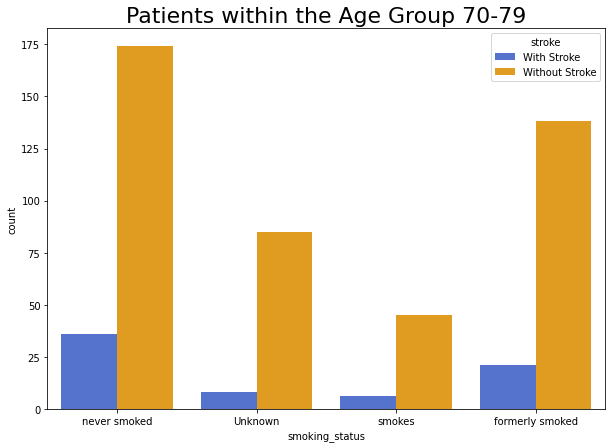

In [29]:
#how many people who have stroke in age group 70-79 smoke
plt.figure(figsize=(10,7))
plt.title('Patients within the Age Group 70-79',fontdict=font)
x = df2[df2['age_group'] == '70-79']
sns.countplot(x="smoking_status",data=x,hue="stroke", palette = colors)
plt.show()

#we can see that most people who have stroke in age group 70-79 never smoked
#although a good number formerly smoked
#thus we cannot necessarily say smokers are more liable to stroke 

### *QUERY 2*

---

**Does body mass index and glucose levels in a person propel a heart stroke?**


> To address this query, we used a scatterplot to get the concentration between the two independent variables



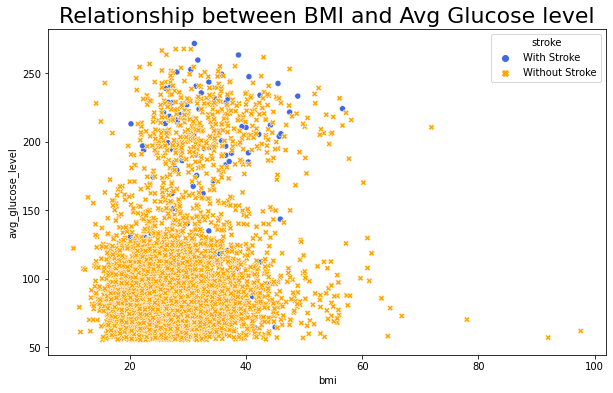

In [30]:
plt.figure(figsize=(10,6))
plt.title("Relationship between BMI and Avg Glucose level", fontdict=font)
hue_colours = {"With Stroke":"royalblue", "Without Stroke":"orange"}
sns.scatterplot(x="bmi", y="avg_glucose_level", data=df2, hue="stroke", palette = hue_colours, style = "stroke")
plt.show()

#from the result, it can be inferred that patients with BMI between 20-40 have avg glucose level within the range of 55-100 and this category of patients tend not to have stroke from the concentration.
#People with stroke tend to have a higher avg glucose level. 

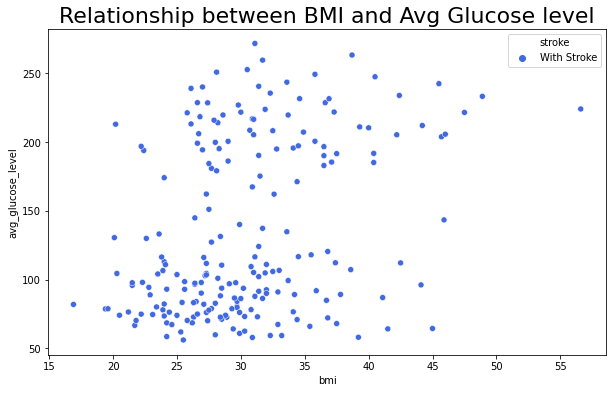

In [35]:
#using a dataset for only those with stroke

plt.figure(figsize=(10,6))
plt.title("Relationship between BMI and Avg Glucose level",fontdict=font)
hue_colours = {"With Stroke":"royalblue", "Without Stroke":"orange"}
sns.scatterplot(x="bmi", y="avg_glucose_level", data=stroke_data, hue="stroke", palette = hue_colours, style = "stroke")
plt.show()


#it can be inferred that most people with stroke have a BMI within the range 20-40
#the population of people with bmi and stroke above 25 is a lot, we can infer that people should be watchful of their bmi
#as 25 and above is more/above the normal human range for humans(which is 18.5 - 24.9)
#there is a fair relationship between the glucose level and bmi, as bmi increases,glucose also increase or is constant in some cases
#people with low and high glucose level with stroke are distributed evenly, so irregadless of your glucose level
#you can be prone to stroke

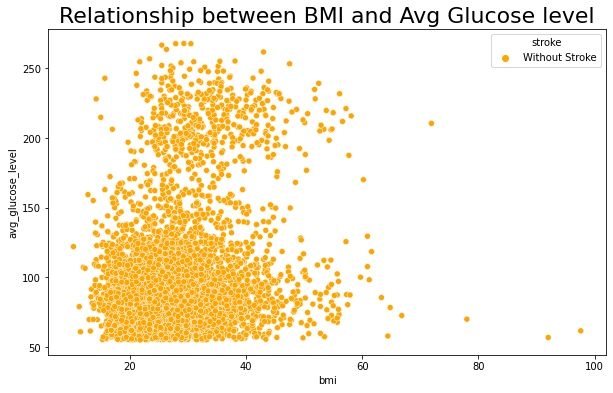

In [32]:
#using a dataset for only those without stroke

plt.figure(figsize=(10,6))
plt.title("Relationship between BMI and Avg Glucose level",fontdict=font)
hue_colours = {"With Stroke":"royalblue", "Without Stroke":"orange"}
sns.scatterplot(x="bmi", y="avg_glucose_level", data=stroke_data2, hue="stroke", palette = hue_colours, style = "stroke")
plt.show()

#there is a similar deduction with these to that of those with stroke, although, way more people here have a lower
# glucose level


<Figure size 720x432 with 0 Axes>

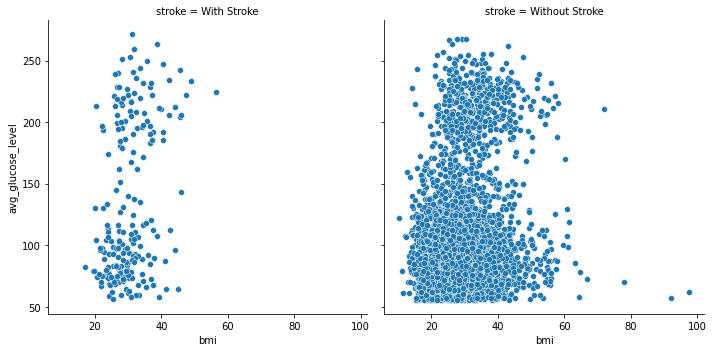

In [33]:
#this further drill down the relationship between the two variables

plt.figure(figsize=(10,6))
sns.relplot(x="bmi",y="avg_glucose_level",data=df2,kind="scatter",col="stroke")

plt.show()

#this confirms that the bmi for people with stroke falls in the range 20-40
#based on the result, it may be difficut to conclude on the relationship. However, considering the patients with stroke have similar concentration as those without stroke, It may be imperative for the patients without stroke to be cautious.

<Figure size 720x432 with 0 Axes>

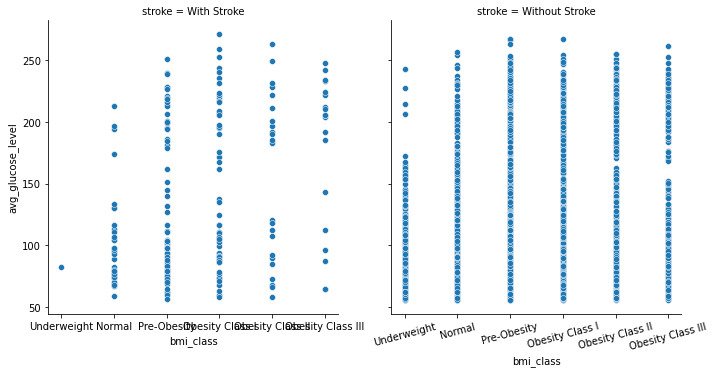

In [ ]:
#this further drills down the relationship between the two variables

plt.figure(figsize=(10,6))
sns.relplot(x="bmi_class",y="avg_glucose_level",data=df2,kind="scatter",col="stroke")
plt.xticks(rotation=15)
plt.show()

#we can see that underweight people are not prone to stroke
#this confirms that the bmi for people with stroke falls in the range 20-40
#based on the result, it may be difficut to conclude on the relationship. However, considering the patients with stroke have similar concentration as those without stroke. It may be imperative for the patients without stroke to be cautious.

### *QUERY 3*

---

Impact of smoking status on Stroke? 

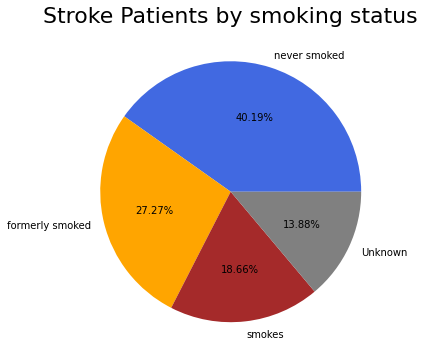

In [36]:
piechart(stroke_data["smoking_status"],"Stroke Patients by smoking status")

#most people with stroke never smoked although a good percentage fromerly smoked
#it is imperative to say that your smokng status does not necessarily influence stroke


#countplt(stroke_data, 'smoking_status', 'stroke', "Stroke Patients by smoking status" )

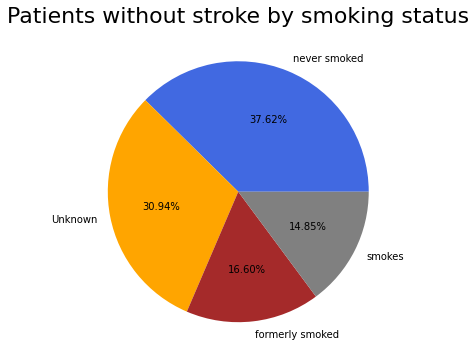

In [37]:
piechart(stroke_data2["smoking_status"],"Patients without stroke by smoking status")

In [38]:
#countplt(stroke_data, 'smoking_status', 'stroke', "Stroke Patients by smoking status" )

### *QUERY 4*

---
Does the type of job contribute to stroke?

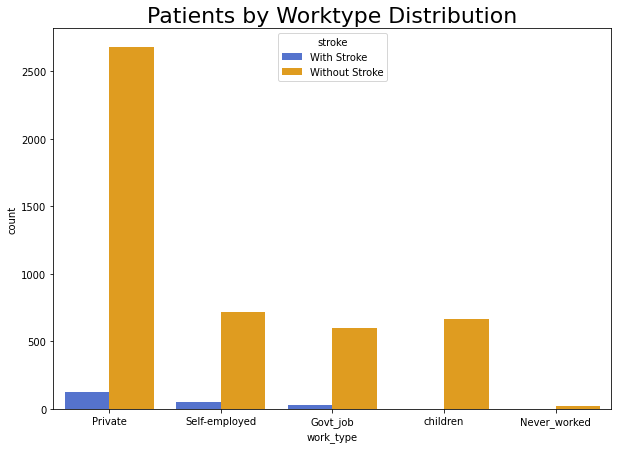

In [ ]:
countplt(df2, 'work_type', 'stroke', 'Patients by Worktype Distribution')
#people who have never worked and children have no indication of stroke
#it is fair to conclude that working has partial impact on stroke.

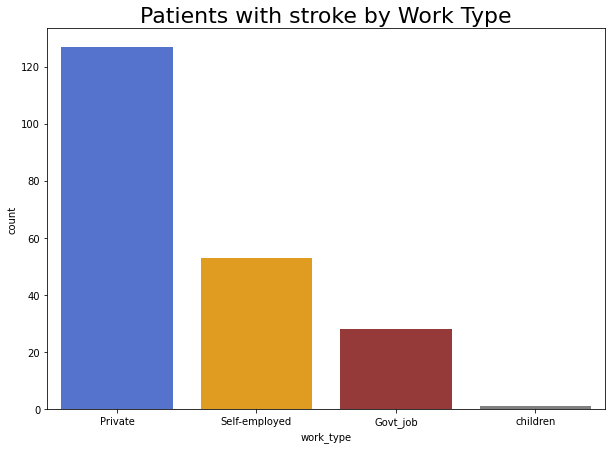

In [ ]:
#drilling further

plt.figure(figsize=(10,7))
plt.title('Patients with stroke by Work Type',fontdict=font)
sns.countplot(x='work_type', data = stroke_data, palette = colors)
plt.show()

#Although the proportion of patients with stroke in the private sector is very small compared to those without. 
#It is important for people in private sector to take caution and manage their working habits considering the sector register more stroke patients compared to the other sectors 

### *QUERY 5*

---

Which gender is more prone to stroke?

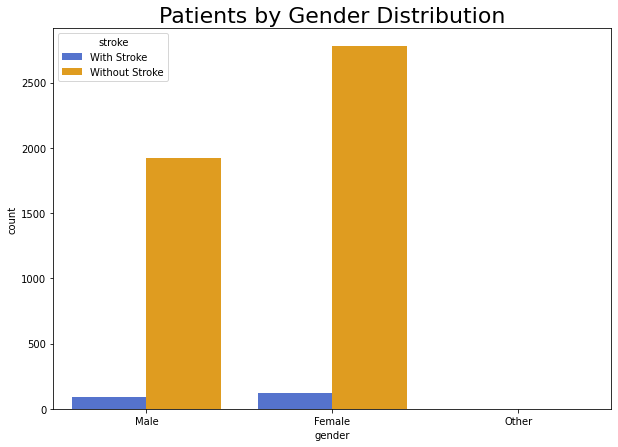

In [ ]:
countplt(df2, 'gender', 'stroke', 'Patients by Gender Distribution')

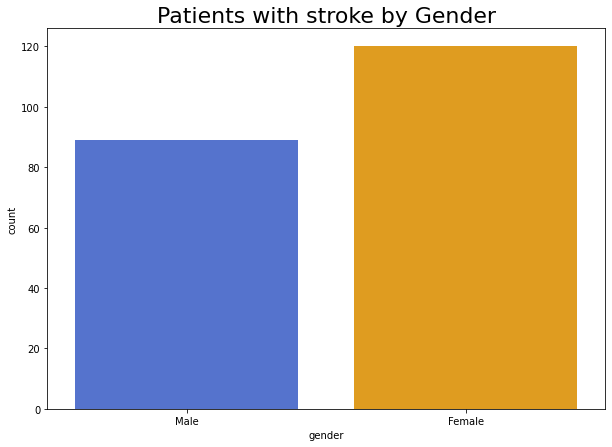

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Patients with stroke by Gender',fontdict=font)
sns.countplot(x='gender', data = stroke_data, palette = colors)
plt.show()



In [ ]:
stroke_data['gender'].value_counts()


Female    120
Male       89
Name: gender, dtype: int64

### *QUERY 6*

---

How does marital status contribute to the chances of having stroke?

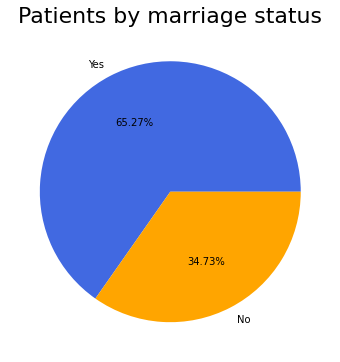

In [ ]:
piechart(df2['ever_married'], "Patients by marriage status")

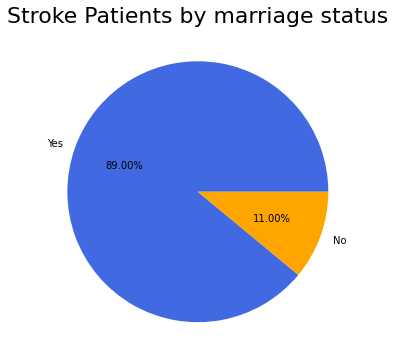

In [ ]:
piechart(stroke_data['ever_married'], "Stroke Patients by marriage status")

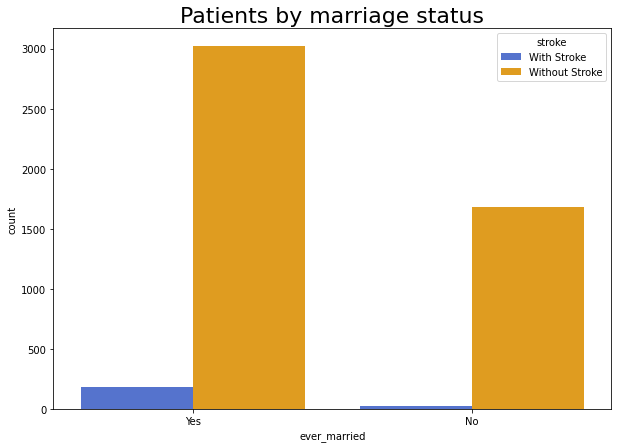

In [ ]:
countplt(df2,'ever_married','stroke',"Patients by marriage status")

### *QUERY 7*

---

Does residence type increase the chances of having stroke? And which residence type poses more threat on individuals?

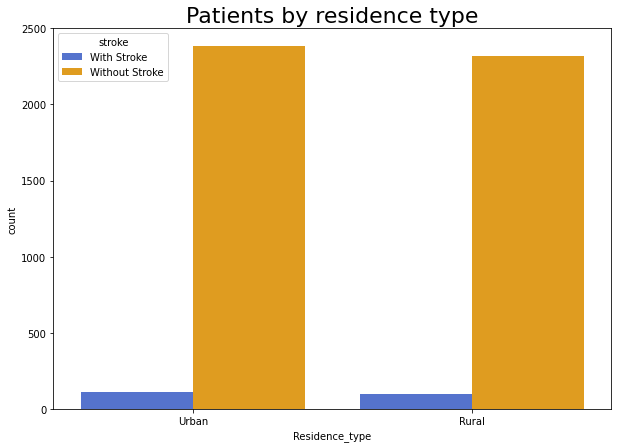

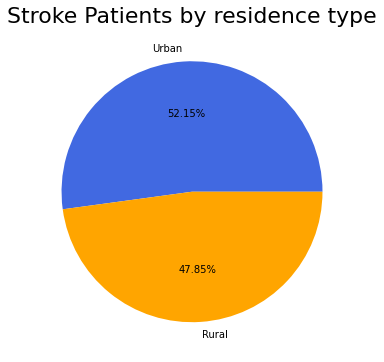

<Figure size 432x288 with 0 Axes>

In [ ]:
countplt(df2,'Residence_type', 'stroke', "Patients by residence type")
piechart(stroke_data['Residence_type'],"Stroke Patients by residence type")
plt.savefig(f"{directory}/Query 7a.png")

### *QUERY 8*

---

Does body mass index increase the risk of stroke?

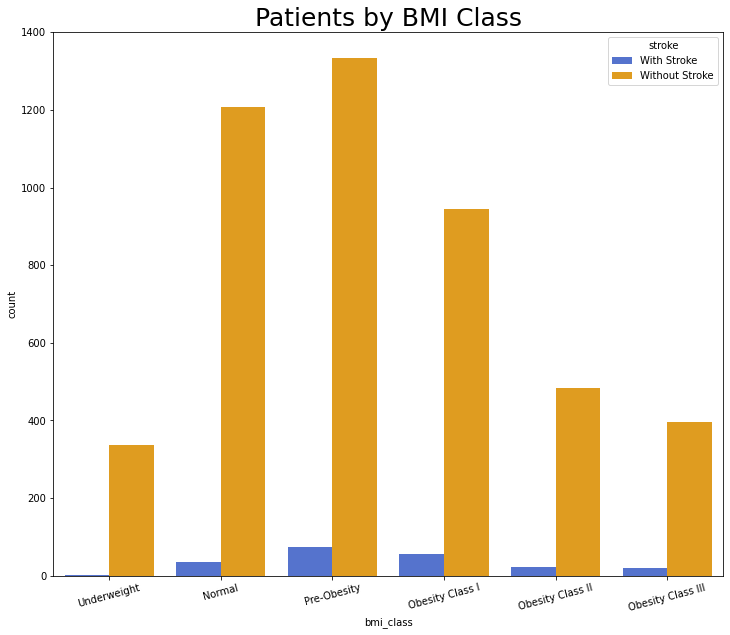

In [ ]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=15)
font = {'size': 25}
plt.title('Patients by BMI Class',fontdict=font)
sns.countplot(x='bmi_class', data = df2, hue = 'stroke', palette = colors)

plt.show()

### *QUERY 9*

---

Does glucose levels increase the risk of stroke?

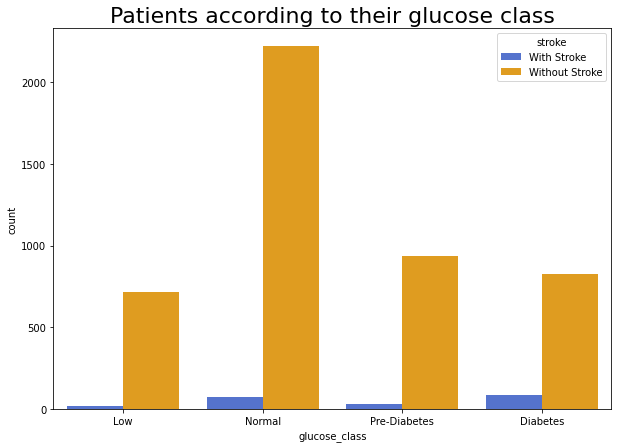

In [ ]:
countplt(df2,'glucose_class','stroke','Patients according to their glucose class')

### *QUERY 10*

---

Is hypertension related to stroke?

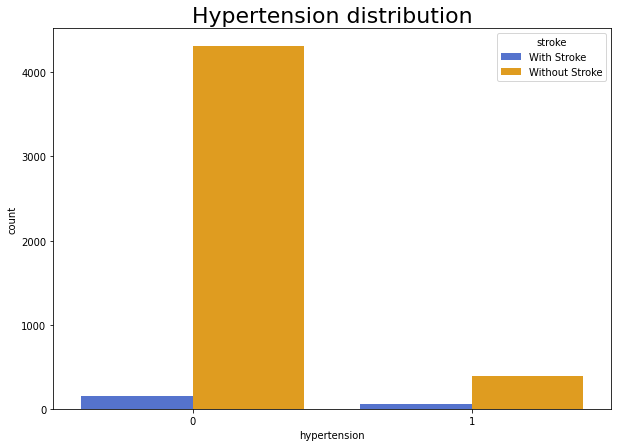

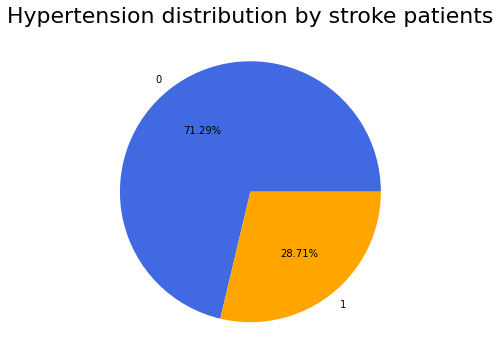

In [ ]:
countplt(df2,'hypertension','stroke', 'Hypertension distribution')

#countplt(stroke_data,'hypertension','stroke', 'Hypertension distribution')
piechart(stroke_data['hypertension'],'Hypertension distribution by stroke patients')

### *QUERY 11*

---

Is heart disease a determining factor for stroke?

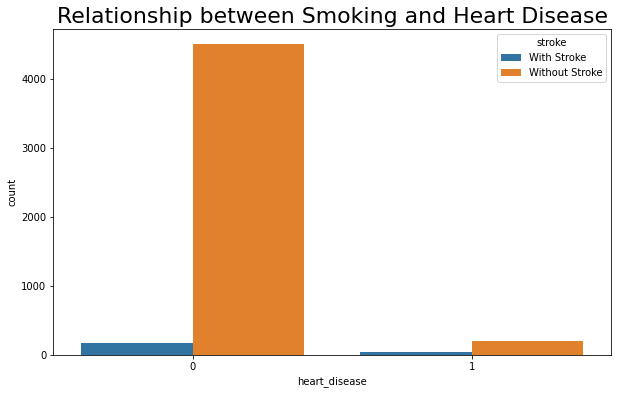

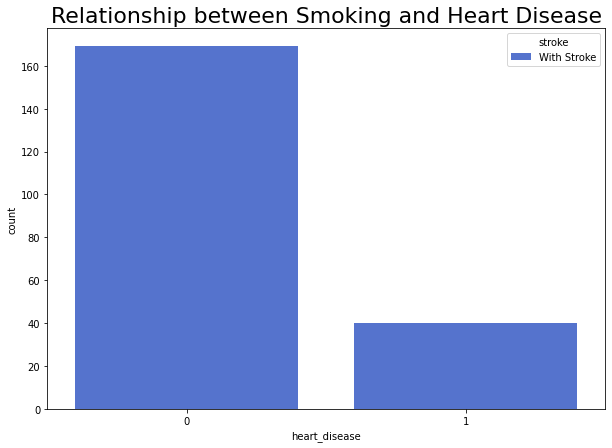

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relationship between Smoking and Heart Disease",fontdict=font)
hue_colours = {"Yes":"red", "No":"k"}
sns.countplot(x="heart_disease", data = df2, hue = 'stroke')
plt.show()

countplt(stroke_data, 'heart_disease', 'stroke', "Relationship between Smoking and Heart Disease")

# **KEY FINDINGS**
A key observation in the analysis is that the dataset is largely imbalanced (inserts the piechart). Due to this, the results from the analysis of some of these indicators may not show the true impact on stroke.
From our analysis, the following are our key findings from the dataset:
1. People within 70-79 age group tends to have stroke. 
2. Smoking does not necessarily influence stroke given that a larger population of those with stroke are not smokers.
3. Patients with BMI between 20-40 have average glucose level within the range of 55-100, and this category of patients tend not to have stroke from the concentration. People with stroke tend to have a higher average glucose level.
However, from further analysis, it may be difficut to conclude on the relationship considering that the patients with stroke have similar features as those without stroke. It may be imperative for the patients without stroke to be cautious.
4. People that are underweight are not likely to have stroke.
4. Children and people who have never worked have no indication of stroke. It is fair to conclude that working has partial impact on stroke.
5. Although the proportion of patients with stroke in the private sector is very small compared to those without stroke. It is important for people in the private sector to take caution and manage their working habits considering the sector register more stroke patients compared to the other sectors
6. For every 3 male with stroke, there are 4 females with stroke.
7. A larger proportion (89%) of people with stroke have been married.
8. There is no established relationship between stroke and heart disease.

# **RECOMMENDATIONS AND CONCLUSION**
1. Although the proportion of patients with stroke in the private sector is very small compared to those without. It is important for people in private sector to take caution and manage their working habits considering the sector register more stroke patients compared to the other sectors.
2. Everyone most especially the married ones should always go for check ups to ensure they are healthy because there is a correlation between married people and population of stroke, in other words, most of the married people have s